## Regresión logística

La regresión logística también se utiliza en problemas de clasificación, especialmente en aquellos donde se busca predecir la probabilidad de que una muestra pertenezca a una clase concreta. Al igual que en el perceptrón, se parte de una combinación lineal de las características para definir una función discriminante:

$$
z(\mathbf{X}) = w_0 + w_1 \, x_1 + w_2 \, x_2 + \dots + w_n \, x_n = w_0 + \mathbf{w}^{T} \, \mathbf{X}
$$

Sin embargo, a diferencia del perceptrón, en la regresión logística esta combinación lineal no se utiliza directamente para clasificar, sino que se transforma mediante una función logística (sigmoide) que acota el resultado entre 0 y 1, interpretándolo como una **probabilidad**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(w_0 + \mathbf{w}^{T} \mathbf{X})}}
$$

La superficie de decisión se define como el conjunto de puntos para los cuales la probabilidad de pertenecer a una clase es del 50%, es decir, cuando $\sigma(z) = 0.5$. Esto ocurre cuando el argumento de la sigmoide es cero, es decir:

$$
w_0 + \mathbf{w}^{T} \, \mathbf{X} = 0
$$

Por tanto, la **superficie de decisión** sigue siendo un hiperplano (o una recta en el caso bidimensional), igual que en el perceptrón. En dos dimensiones, se puede escribir como:

$$
w_0 + w_1 \, x_1 + w_2 \, x_2 = 0
$$

lo que equivale a:

$$
x_2 = -\frac{w_1}{w_2} \, x_1 - \frac{w_0}{w_2}
$$

En resumen, aunque la regresión logística y el perceptrón comparten la misma estructura lineal para definir la frontera de decisión, la regresión logística introduce una interpretación probabilística y una función de activación continua, lo que permite un aprendizaje más estable y una salida interpretada como probabilidad.

Arquitectura:

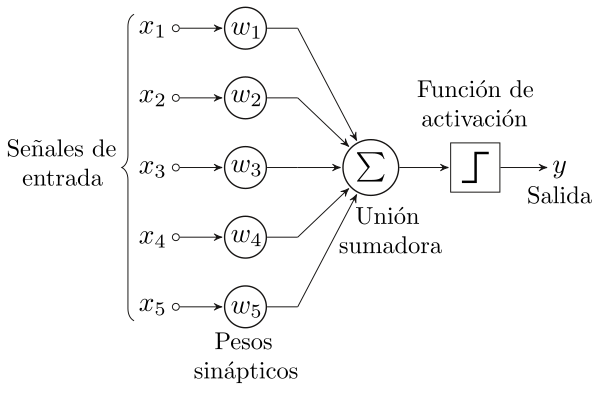

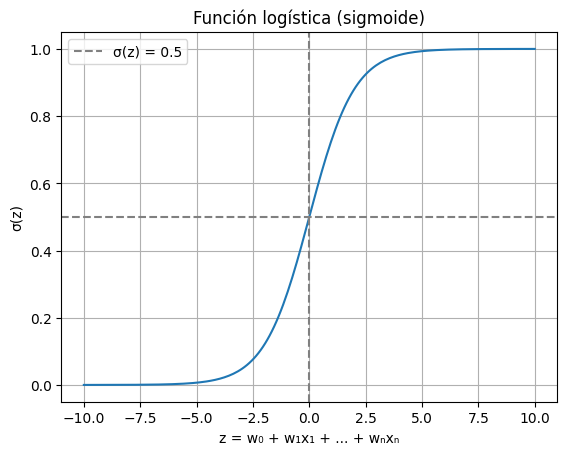

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de entrada
z = np.linspace(-10, 10, 200)
# Función sigmoide
sigmoid = 1 / (1 + np.exp(-z)) # distrubución de probabilidad, si es mayor a 0.5 es 1, si es menor a 0.5 es 0

plt.plot(z, sigmoid)
plt.title("Función logística (sigmoide)")
plt.xlabel("z = w₀ + w₁x₁ + ... + wₙxₙ")
plt.ylabel("σ(z)")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', label="σ(z) = 0.5")
plt.axvline(0, color='gray', linestyle='--')
plt.legend()
plt.show()

### Comportamiento de la función sigmoide en regresión logística

La regresión logística utiliza la **función sigmoide** para transformar una combinación lineal de las características de entrada en una **probabilidad** entre 0 y 1. La ecuación de la función sigmoide es:


$\sigma(z) = \frac{1}{1 + e^{-z}}$


donde $z = w_0 + w_1 x_1 + \dots + w_n x_n$ es una combinación lineal de las variables de entrada.

#### Comportamiento en los extremos:

- **Cuando $z \to +\infty$**:
  $\sigma(z) \to 1$
  El modelo asigna una **alta probabilidad** a la clase positiva (por ejemplo, clase 1). Esto indica una **alta confianza** en que la muestra pertenece a esa clase.

- **Cuando z = 0**:
  $\sigma(z) = \frac{1}{1 + e^{0}} = \frac{1}{2} = 0.5$
  El modelo está **indeciso**, asignando un 50% de probabilidad a cada clase. Este valor marca la **frontera de decisión** entre clases.

- **Cuando $z \to -\infty$**:
  $\sigma(z) \to 0$
  El modelo asigna una **alta probabilidad** a la clase negativa (por ejemplo, clase 0). Esto indica una **alta confianza** en que la muestra **no** pertenece a la clase positiva.

#### Interpretación (ojito! para el examen de teoria)

La función sigmoide actúa como un "suavizador" de decisiones. En lugar de tomar una decisión binaria abrupta (como el perceptrón), proporciona una transición suave entre clases, permitiendo que el modelo:

- Exprese **incertidumbre** cuando los datos están cerca de la frontera.
- Sea **entrenable con gradientes suaves**, lo cual es ideal para optimización mediante descenso del gradiente.
- Genere **probabilidades interpretables**, útiles en muchas aplicaciones reales como medicina, crédito, etc.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression # Regresión logística
# la regresión logística es un modelo lineal generalizado, aka es lo mismo que el perceptrón pero cambia la función de activación

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X,y = make_blobs(100, n_features=2, centers=[(0,0),(4,1)], cluster_std=(1,0.5))

clf = LogisticRegression()
clf.fit(X,y)
# Te da los coeficientes de la recta
print(clf.coef_)
print(clf.intercept_)

[[2.61045283 0.41993023]]
[-6.61100139]


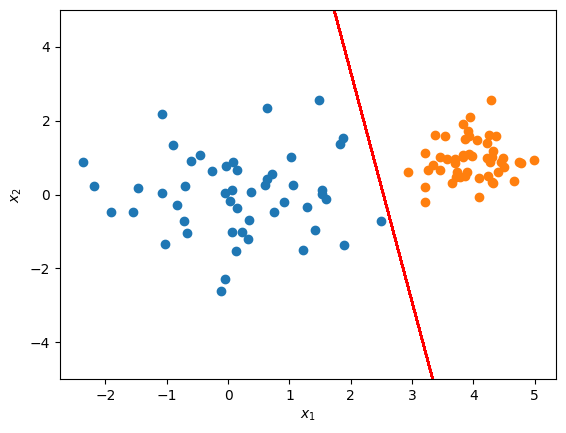

In [4]:
# la recta de decisión es igual a w0 + w1x1 + w2x2 = 0
# despejando x2 = (-w0 - w1x1) / w2
# igualito al perceptrón
m = -clf.coef_[0][0] / clf.coef_[0][1]
n = -clf.intercept_[0] / clf.coef_[0][1]
recta = X[:,0] * m + n
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.plot(X[:,0], recta, 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim(-5,5)
plt.show()

In [ ]:
# Para obtener la distancia de cada punto a la superficie de decisión
# se puede hacer lo mismo con el perceptrón
proporicional_distancia = clf.decision_function(X)
print(proporicional_distancia[y==0])
print(proporicional_distancia[y==1])

[ -8.3887792   -3.4156221  -10.38486505 -12.20647649 -11.80043687
  -4.51605934  -6.37874482  -7.8154025   -4.05761143  -4.86545249
  -7.04475189  -5.94353665  -6.02451685  -1.66242419  -6.89900317
  -4.93222912  -3.32064913  -8.9016718   -7.71680961  -6.86315979
  -5.61831759  -9.39204289  -9.8673692   -6.45766932  -6.39130336
  -4.32685908  -6.24321205  -6.58654893  -0.38742348  -6.38252799
  -2.50177944  -3.75622661 -10.83589435  -8.52823417  -1.0881829
  -8.02028565  -2.60219566  -2.26240532 -12.42755494  -4.7648779
  -6.02788557  -2.55043798  -8.78838237  -8.34730427  -6.70800711
  -8.78119993  -3.50999762  -3.99372501  -1.25520823  -7.3374145 ]
[2.69566696 4.04246629 2.42470459 5.4603644  5.72718011 4.27858649
 1.86239551 4.09890614 4.81700497 3.27913681 3.40918183 4.92760641
 4.99986071 6.12077237 6.7796107  3.45284279 3.08535462 2.85116299
 3.44554827 5.37614656 3.28656864 3.04015387 5.454826   4.1945813
 4.77848975 1.66757287 4.54477676 5.05114748 5.65933896 4.61689041
 6.2247

OJITO! Posible ejercicio de examen: Dado un modelo de regresión logística entrenado para clasificar entre dos clases, se tiene un conjunto de ejemplos etiquetados para cada clase.

Pregunta: ¿Respecto a cuál de las dos clases el modelo muestra mayor indecisión?

## Multiclase

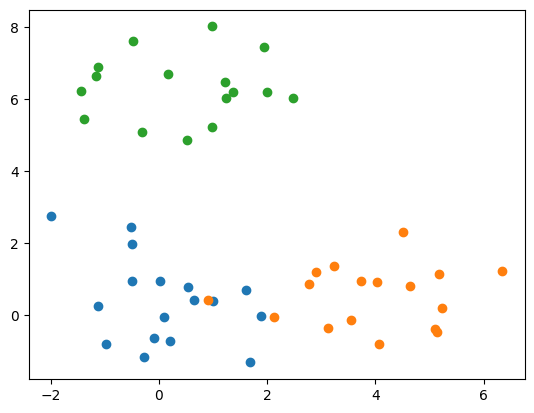

In [6]:
X, y = make_blobs(50, n_features=2, centers=[(0,0), (4,1), (0,6)])

n_clases=3
for clase in range(n_clases):
    puntos_clase = y == clase
    plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
plt.show()

In [ ]:
clf = LogisticRegression() # Regresión logística usando softmax para clasificación multiclase (lo veran en teoria)

clf.fit(X, y)
print(clf.coef_)

[[-0.93674931 -0.80852779]
 [ 0.98498082 -0.32989136]
 [-0.04823151  1.13841915]]


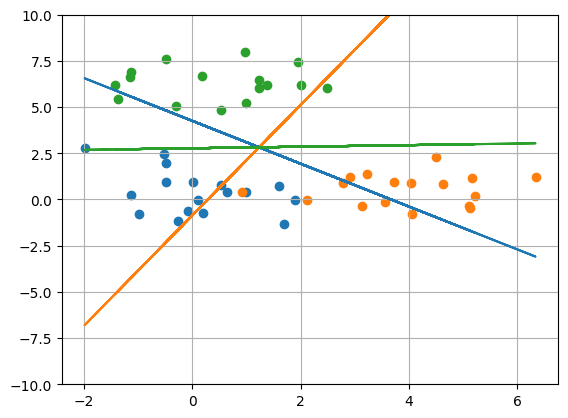

In [8]:
for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X[:,0] * m + n
    puntos_clase = y == clase
    plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
    plt.plot(X[:,0], recta)
plt.ylim(-10, 10)
plt.grid()
plt.show()

In [ ]:
clf = LogisticRegression(multi_class='ovr') # clasiicación multiclase binaria

clf.fit(X, y)
print(clf.coef_)

[[-1.59361339 -1.25619416]
 [ 1.68117656 -0.45606983]
 [-0.04429407  1.68228764]]


/home/miguel/miniconda3/envs/aa1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


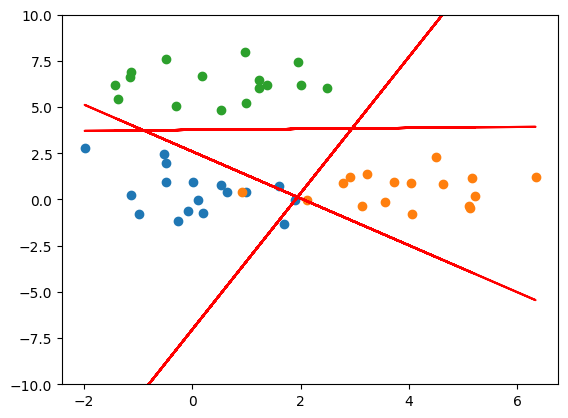

In [11]:
for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X[:,0] * m + n
    puntos_clase = y == clase
    plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
    plt.plot(X[:,0], recta, 'r')
plt.ylim(-10, 10)
plt.show()

In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('datos/iris.csv', sep=',')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.values[:,:-1]
y_train = df_train.values[:,-1]
X_test = df_test.values[:,:-1]
y_test = df_test.values[:,-1]


In [ ]:
clf = LogisticRegression(max_iter=1000) #sotfmax
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud regresión logística: {exactitud*100:.2f}%')

Exactitud regresión logística: 96.67%


## Ejercicios

Vas a desarrollar una aplicación de visión por computador cuyo objetivo es determinar el género de una persona al entrar en un local. Para ello, trabajarás con la base de datos CelebA, la cual incluye, para cada imagen, el género de la persona y un conjunto de características visuales como formato, color, forma facial, entre otras.

Estas características no se extraen directamente de las imágenes, sino que han sido preprocesadas previamente por otro equipo, utilizando un algoritmo basado en redes neuronales para generar representaciones numéricas de cada imagen.

Tu tarea se centra en la parte de clasificación, es decir, en diseñar, entrenar y evaluar un modelo que, a partir de estas características extraídas, sea capaz de predecir correctamente el género de las personas.

1.Leer el conjunto de entrenamiento y de test de los archivos CelebA-1K-train.csv
y CelebA-1K-test.csv respectivamente.

2.Entrenar un clasificador lineal biclásico utilizando el método de Regresión Logística
y otro usando el perceptron obtener la tasa de acierto de los clasificadorres en las muestras del conjunto de test utilizar la función accuracy_score

3.Clasificar las imágenes que están en el archivo comprimido ImagenesParaClasificar.zip
y cuyas características están en el conjunto de datos de test CelebA-1K-test.csv,
indicando cuales de ellas las clasifica incorrectamente el clasificador

In [17]:
import os

def clasificar_imagenes(clf, df_test, carpeta_imagenes='ImagenesParaClasificar'):
    """
    Clasifica las imágenes en una carpeta utilizando un clasificador ya entrenado
    y un DataFrame con la información correspondiente.

    Parámetros:
    - clf: clasificador entrenado (por ejemplo, un modelo de sklearn)
    - df_test: DataFrame con columnas ['Image_name', 'Genero', ...características]
    - carpeta_imagenes: nombre de la carpeta con las imágenes a clasificar
    """
    nombres = os.listdir(carpeta_imagenes)
    print(f'Se encontraron {len(nombres)} imágenes para clasificar.\n')

    for nombre in nombres:
        indice = df_test['Image_name'] == nombre
        fila = df_test[indice]
        
        if fila.empty:
            print(f'{nombre}: no se encontró en el DataFrame.\n')
            continue

        genero = fila.values[0, 1]
        X = fila.values[:, 2:]

        genero_pred = clf.predict(X)
        print(f'{nombre} → género etiquetado: {genero}')
        print(f'{nombre} → género predicho:  {genero_pred[0]}\n')



4. Buscar la mejor configuración de hiperparametros

Consulta la documentación oficial de ambos modelos (por ejemplo, en Scikit-learn).

Identifica y entiende los hiperparámetros que puedes modificar en cada uno (como tasa de aprendizaje, regularización, número de iteraciones, tipo de penalización, etc.).

Entrena ambos modelos utilizando diferentes combinaciones de hiperparámetros.

Evalúa el rendimiento de cada configuración utilizando el accuracy

Elige tu mejor modelo (mejor combinación de modelo + hiperparámetros) y anota los resultados finales.

Compara tu mejor resultado con el de tus compañeros. ¿Quién ha conseguido la mejor precisión? ¿Con qué modelo y con qué configuración?